### 1-1. Daum 뉴스기사 제목 스크래핑하기


In [9]:
import requests
from bs4 import BeautifulSoup

# 사회 뉴스 
req_param = {
    'section': 'society'
}
url = 'https://news.daum.net/{section}'.format(**req_param)
print(url)

# 요청 헤더 설정 : 브라우저 정보
req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
}

# requests 의 get() 함수 호출하기 
res = requests.get(url, headers=req_header)
res.encoding = 'utf-8'
print(res.status_code, res.ok)
print(type(res))
print(res)

# 응답(response)이 OK 이면
# 응답 (response)에서 text 추출
if res.ok:
    html = res.text
    # BeautifulSoup 객체 생성
    soup = BeautifulSoup(html, "html.parser")   

    # CSS 선택자
    # print(soup.select("a.item_newsheadline2"))
    '''
       <a class='item_newsheadline2' href='https://v.daum.net/v/...'>
         <div class='cont_thumb'>
           <strong class='tit_txt'>기사 제목</strong>
    '''
    a_tags = soup.select("a.item_newsheadline2")
    print(len(a_tags))
    print(type(a_tags)) #[Tag,Tag,Tag]

    # <a> 태그 리스트 순회하기
    for idx, a_tag in enumerate(a_tags, 1):        
        link = a_tag['href']
        strong_tag = a_tag.select_one('strong.tit_txt')
        title = strong_tag.text.strip() if strong_tag else '제목 없음'
        print(f'{idx} {title} {link}')
else:
    print(f'Error Code={res.status_code}')

# <a> 태그 리스트 순회하기    

# 응답(response)이 Error 이면 status code 출력

https://news.daum.net/society
200 True
<class 'requests.models.Response'>
<Response [200]>
9
<class 'bs4.element.ResultSet'>
1 [단독] '의정갈등'에 '장거리 이송'도 급증‥비수도권 직격탄 https://v.daum.net/v/20250722203113026
2 문에 ‘안전고리’ 다니…쪽방촌 여성 주민 방도 시원해졌다 https://v.daum.net/v/20250722203005994
3 [단독] 전세금 760억 등친 '수원 왕회장'…감옥서도 지인 앞세워 '돈벌이' https://v.daum.net/v/20250722202940985
4 [단독] 응급실 뺑뺑이 악화‥'2시간 초과' 2배 이상 늘어 https://v.daum.net/v/20250722202815955
5 중3, 대도시·읍면 ‘학업 격차’ 더 벌어지고 협동력 더 떨어졌다 https://v.daum.net/v/20250722202527894
6 박완수 경남지사 ‘경제수도 도약’·‘도민행복 시대 정착’ 이룬다 https://v.daum.net/v/20250722202517891
7 극한호우 잦고 강한데‥지정에 5년 걸리는 '산사태 취약지역' https://v.daum.net/v/20250722202513888
8 폭염 시작하자 그만둔 '실적왕' 택배기사... 다른 이유가 있었다 https://v.daum.net/v/20250722202408880
9 산불 지역은 피해 없다?‥엉터리 보고에 주민 '분통' https://v.daum.net/v/20250722202213848


### 1-2. 여러개의 section 중 하나를 선택해서 url에서 뉴스기사의 링크와 제목을 출력하는 코드(함수)



In [20]:
import requests
from bs4 import BeautifulSoup

section_dict = {'기후환경': 'climate', '사회': 'society', '경제': 'economy', '정치': 'politics',
                 '국제': 'world', '문화': 'culture', '생활': 'life', 'IT/과학': 'tech', '인물': 'people'}

def print_news(section):
    sid = section_dict[section]
    url = f'https://news.daum.net/{sid}'
    print(f'{url} {section} 뉴스')

    # 요청 헤더 설정 : 브라우저 정보
    req_header = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
    }

    # requests 의 get() 함수 호출하기 
    res = requests.get(url, headers=req_header)
    res.encoding = 'utf-8'
    print(res.status_code, res.ok)

    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, "html.parser")

        # 뉴스 리스트 추출
        a_tags = soup.select("ul.list_newsheadline2 > li > a")
        print(len(a_tags))

        for idx, a_tag in enumerate(a_tags, 1):
            title_tag = a_tag.select_one("strong.tit_txt")
            title = title_tag.text.strip() if title_tag else "제목 없음"
            link = a_tag['href']
            print(f'{idx} {title} {link}')
    else:
        print(f'Error Code={res.status_code}')

In [21]:
print_news('사회')

https://news.daum.net/society 사회 뉴스
200 True
9
1 정기명 여수시장, 순천으로 옮길 여수MBC 맹비난 https://v.daum.net/v/20250724220104509
2 주택 물량 확보에 속도전 '투트랙'…입주 시기 5.5년 단축 https://v.daum.net/v/20250724215346419
3 [단독] "비즈니스 모두 태우려 비행기 두대 나눠 예약"…혈세외유 추적 https://v.daum.net/v/20250724213228122
4 '특혜 반대' 싸늘한 여론…전공의들, 환자단체 찾아 소통 시도 https://v.daum.net/v/20250724213049084
5 해병특검, 임성근 비화폰 통신 기록 확보…구명로비 수사 속도 https://v.daum.net/v/20250724213033068
6 폭우로 5년새 두 번이나…잠겨버린 공장·주택 "막막합니다" https://v.daum.net/v/20250724212658969
7 "그날 밤 진실 온전히 밝혀지길…증언 용기내 달라" 이태원참사 1000일 https://v.daum.net/v/20250724211842781
8 [단독] '롤스로이스 사건' 반전…수사 경찰 간부 억대 향응 https://v.daum.net/v/20250724211209604
9 사천 남일대해수욕장, 이름의 비밀을 아시나요 https://v.daum.net/v/20250724210806476


### 2.1 Nate 뉴스기사 제목 스크래핑하기 

In [75]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display
import os

section_dict = {
    '최신뉴스': 'n0100',
    '정치': 'n0200',
    '경제': 'n0300',
    '사회': 'n0400',
    '세계': 'n0500',
    'IT/과학': 'n0600',
}

def scrape_nate_news(section, max_articles=3):
    if section not in section_dict:
        print(f"[오류] 유효하지 않은 섹션 이름입니다: {section}")
        return

    base_url = 'https://news.nate.com'
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    sid = section_dict[section]
    section_url = f"{base_url}/section?mid={sid}"
    print(f"[{section}] {section_url}")

    res = requests.get(section_url, headers=headers)
    res.encoding = 'euc-kr'

    if not res.ok:
        print(f"[오류] 섹션 페이지 접속 실패: {res.status_code}")
        return

    soup = BeautifulSoup(res.text, 'html.parser')
    news_links = soup.select("div#newsContents a.lt1")

    for idx, a_tag in enumerate(news_links[:max_articles], 1):
        title = a_tag.get_text(strip=True)
        news_url = urljoin(base_url, a_tag['href'])
        print(f"\n{idx}. {title}")
        print(news_url)

        news_res = requests.get(news_url, headers=headers)
        news_res.encoding = 'euc-kr'

        if not news_res.ok:
            print("뉴스 페이지 접속 실패")
            continue

        news_soup = BeautifulSoup(news_res.text, 'html.parser')
        img_tag = news_soup.select_one("img#mainimg0")

        if img_tag and 'src' in img_tag.attrs:
            img_src = img_tag['src']
            img_url = urljoin("https:", img_src)

            img_res = requests.get(img_url, headers=headers)
            if img_res.ok:
                img_data = img_res.content
                filename = f"{section}_{idx}.jpg"
                with open(filename, 'wb') as f:
                    f.write(img_data)
                    print(f"이미지 저장 완료: {filename} ({len(img_data):,} bytes)")
                    display(Image(filename))
            else:
                print("이미지 다운로드 실패:", img_url)
        else:
            print("대표 이미지 없음")

[세계] https://news.nate.com/section?mid=n0500

1. 러 극동서 49명 탑승 노후 여객기 추락…생존자 없는 듯(종합2보)승객 43명·승무원 6명…1976년 제작돼 '사고빈발' An-24 기종 착륙 준비 중 레이더서 실종…공중수색 중 화염 휩싸인 동체 발견 (모스크바·서울=연합뉴스) 최...
https://news.nate.com/view/20250724n41251?mid=n0500
이미지 저장 완료: 세계_1.jpg (35,657 bytes)


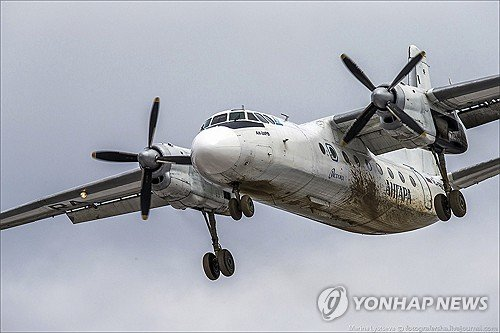


2. 스페인서 여성 전용 주차장 논란…남녀 모두 "차별적"북서부 레온시, 안전 문제로 여성 전용 공간 마련 여성들 "남성 중심적 사고"…남성들 "성평등에 반해" (파리=연합뉴스) 송진원 특파원 = 스페인의 한 도시가 여...
https://news.nate.com/view/20250724n39215?mid=n0500
이미지 저장 완료: 세계_2.jpg (24,335 bytes)


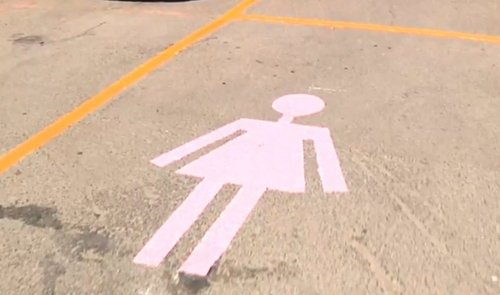


3. 러시아 아무르서 49명 탄 여객기 연락두절…추락, 전원 숨진 듯/안가라 항공 홈페이지러시아 동부 아무르주에서 약 50명이 탑승한 여객기가 연락이 두절됐다.24일 로이터와 타스통신 등에 따르면, 이날 러시아 동부 아무르주 ...
https://news.nate.com/view/20250724n31512?mid=n0500
이미지 저장 완료: 세계_3.jpg (24,080 bytes)


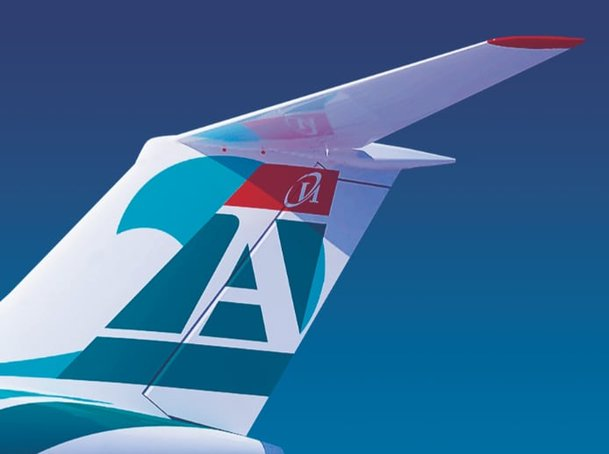

In [80]:
scrape_nate_news('세계')

### 2.2 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기



In [74]:
import requests
from bs4 import BeautifulSoup
import os

webtoon_url = 'https://comic.naver.com/webtoon/detail?titleId=800770&no=148&week=thu'
req_header = {
    'referer':webtoon_url,
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
}
res = requests.get(webtoon_url)
print(res.status_code)
if res.ok:
    soup = BeautifulSoup(res.text, 'html.parser')
    print(len(soup.select("img[src$='.jpg']")))
    #https://image-comic.pstatic.net/webtoon
    print(len(soup.select("img[src^='https://image-comic.pstatic.net/webtoon']")))
    print(len(soup.select("img[src*='IMAG01']"))) # 일치함
    # img src file명을 저장할 list 선언
    img_url_list = list() #['http://xxx/aa.jpg']
    img_tags = soup.select("img[src*='IMAG01']") #img_tags의 타입은 Resultset [Tag,Tag,]
    for img_tag in img_tags: #img_tag 의 타입은 Tag <img>
        img_url = img_tag['src']
        img_url_list.append(img_url)
    #print(len(img_url_list), img_url_list[0:2])

    # img 디렉토리가 없으면 생성하기
    imgdir_name = 'img2'
    if not os.path.isdir(imgdir_name):
        os.mkdir(imgdir_name)

    for jpg_url in img_url_list:
        res = requests.get(jpg_url, headers=req_header)
        if res.ok:
            # binary data 추출하기
            img_data = res.content
            # img/xxx.jpg 디렉토리명과 jpg파일명을 join
            dir_name = os.path.join(imgdir_name,os.path.basename(jpg_url))
            with open(dir_name,'wb') as file:
                print(f'Writing to {dir_name}({len(img_data):,} bytes)')
                file.write(img_data)
        else:
           print(f'Error Code = {res.status_code}')    

200
241
241
92
Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_1.jpg(132,131 bytes)


132131

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_2.jpg(179,067 bytes)


179067

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_3.jpg(141,992 bytes)


141992

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_4.jpg(185,493 bytes)


185493

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_5.jpg(144,860 bytes)


144860

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_6.jpg(213,388 bytes)


213388

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_7.jpg(203,656 bytes)


203656

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_8.jpg(186,604 bytes)


186604

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_9.jpg(204,645 bytes)


204645

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_10.jpg(169,600 bytes)


169600

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_11.jpg(155,081 bytes)


155081

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_12.jpg(183,100 bytes)


183100

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_13.jpg(179,446 bytes)


179446

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_14.jpg(140,301 bytes)


140301

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_15.jpg(99,285 bytes)


99285

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_16.jpg(178,047 bytes)


178047

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_17.jpg(167,571 bytes)


167571

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_18.jpg(210,399 bytes)


210399

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_19.jpg(183,343 bytes)


183343

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_20.jpg(183,175 bytes)


183175

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_21.jpg(156,693 bytes)


156693

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_22.jpg(136,534 bytes)


136534

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_23.jpg(204,902 bytes)


204902

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_24.jpg(141,629 bytes)


141629

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_25.jpg(136,977 bytes)


136977

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_26.jpg(108,809 bytes)


108809

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_27.jpg(147,363 bytes)


147363

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_28.jpg(127,876 bytes)


127876

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_29.jpg(281,625 bytes)


281625

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_30.jpg(158,059 bytes)


158059

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_31.jpg(241,078 bytes)


241078

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_32.jpg(263,961 bytes)


263961

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_33.jpg(247,955 bytes)


247955

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_34.jpg(183,867 bytes)


183867

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_35.jpg(128,568 bytes)


128568

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_36.jpg(159,353 bytes)


159353

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_37.jpg(146,255 bytes)


146255

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_38.jpg(138,710 bytes)


138710

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_39.jpg(153,131 bytes)


153131

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_40.jpg(148,533 bytes)


148533

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_41.jpg(149,618 bytes)


149618

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_42.jpg(259,517 bytes)


259517

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_43.jpg(187,984 bytes)


187984

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_44.jpg(144,928 bytes)


144928

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_45.jpg(130,663 bytes)


130663

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_46.jpg(128,519 bytes)


128519

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_47.jpg(113,683 bytes)


113683

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_48.jpg(289,162 bytes)


289162

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_49.jpg(142,574 bytes)


142574

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_50.jpg(179,888 bytes)


179888

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_51.jpg(138,596 bytes)


138596

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_52.jpg(148,791 bytes)


148791

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_53.jpg(181,680 bytes)


181680

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_54.jpg(191,547 bytes)


191547

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_55.jpg(190,367 bytes)


190367

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_56.jpg(221,129 bytes)


221129

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_57.jpg(162,919 bytes)


162919

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_58.jpg(185,817 bytes)


185817

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_59.jpg(155,476 bytes)


155476

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_60.jpg(152,328 bytes)


152328

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_61.jpg(166,953 bytes)


166953

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_62.jpg(84,001 bytes)


84001

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_63.jpg(135,417 bytes)


135417

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_64.jpg(233,114 bytes)


233114

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_65.jpg(161,083 bytes)


161083

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_66.jpg(158,603 bytes)


158603

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_67.jpg(158,092 bytes)


158092

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_68.jpg(170,826 bytes)


170826

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_69.jpg(169,499 bytes)


169499

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_70.jpg(185,470 bytes)


185470

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_71.jpg(154,007 bytes)


154007

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_72.jpg(182,919 bytes)


182919

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_73.jpg(172,665 bytes)


172665

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_74.jpg(189,002 bytes)


189002

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_75.jpg(143,696 bytes)


143696

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_76.jpg(148,818 bytes)


148818

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_77.jpg(178,482 bytes)


178482

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_78.jpg(157,933 bytes)


157933

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_79.jpg(144,951 bytes)


144951

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_80.jpg(232,551 bytes)


232551

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_81.jpg(133,847 bytes)


133847

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_82.jpg(164,578 bytes)


164578

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_83.jpg(186,836 bytes)


186836

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_84.jpg(172,294 bytes)


172294

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_85.jpg(199,989 bytes)


199989

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_86.jpg(145,008 bytes)


145008

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_87.jpg(176,609 bytes)


176609

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_88.jpg(226,832 bytes)


226832

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_89.jpg(278,704 bytes)


278704

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_90.jpg(175,568 bytes)


175568

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_91.jpg(195,117 bytes)


195117

Writing to img2\20250423141131_e2678c95e8ed46091328ca558681822c_IMAG01_92.jpg(66,541 bytes)


66541